# SymPy - symbolické výpočty v Pythonu
**Na úvod**

Někteří z vás možná znáte nějaký systém pro *počítačovou algebru* (Computer Algebra Systems -- CAS), např. Maple, Mathematica, Derive, Maxima, Reduce. Pro Python existují dva velké projekty počítačové algebry:

* [SymPy](http://sympy.org) - modul který může být použit v jakémkoli Python programu a je dobře podporován v Jupyter Notebook. 
* [Sage](http://www.sagemath.org/) - toto je už kompletní (a velice obsáhlý) systém, který si klade za cíl být open source konkurentem komerčním produktům.

My se tady podíváme na některé základní možnosti SymPy.

In [1]:
import sympy

In [2]:
sympy.init_printing()

## Definujeme symboly

Pro symbolické výpočty potřebujeme pochopitelně symboly, tak jak jsme zvyklí už z matematiky na základní škole. V Pythonu samotném máme sice proměnné, které jsou v podstatě také symboly, ale operace s nimy se řídí zcela jinými pravidly než potřebujeme pro symbolické výpočty. Naštěstí tu je třída `sympy.Symbol`.

In [36]:
x = sympy.Symbol('x')
x

x

Co když napíšeme něco trochu složitějšího.

In [4]:
expression = (sympy.pi + x) / 2
expression

x   π
─ + ─
2   2

In [5]:
# co jsme to vůbec dostali za typ
type(expression)


sympy.core.add.Add

Můžeme také přiřadit symbolům nějaké vlastnosti (to se pak pochopitelně může projevit v dalších výpočtech).

In [6]:
a = sympy.Symbol('a', real=True)
a.is_real

True

In [7]:
b = sympy.Symbol('b', positive=True)

In [8]:
b.is_negative

False

In [9]:
b > 0

True

### Zlomky

In [10]:
r1 = sympy.Rational(4,5)
r2 = sympy.Rational(5,4)
r1, r2

(4/5, 5/4)

In [11]:
r1 + r2

41
──
20

## Vyčíslování

In [12]:
y = (x + sympy.pi)**2
y

       2
(x + π) 

Numerickou hodnotu můžeme získat pomocí funkce `N`. Často také využijeme metodu `subs`:

In [19]:
expression = y.subs(x, 2)
expression


       2
(2 + π) 

In [20]:

sympy.N(expression, n=5)


26.436

To samé pomocí metody `evalf`. Pro obojí můžeme zadat počet platných číslic.

In [21]:
sympy.pi.evalf(100)

3.1415926535897932384626433832795028841971693993751058209749445923078164062862
08998628034825342117068

Pokud chceme vytvořit ze symbolického výrazu funkci, použijeme `lambdify`:

In [22]:
# první argument je seznam proměnných (podobně jako pro lambda funkce)
f_sympy = (x + sympy.pi)**2
print(f_sympy)

f_x = sympy.lambdify([x], f_sympy)
print(f_x)

(x + pi)**2
<function _lambdifygenerated at 0x000001AAA74DB550>


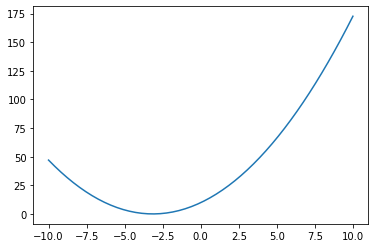

In [17]:
import numpy as np
import matplotlib.pyplot as plt

xa = np.linspace(-10, 10)
plt.plot(xa, f_x(xa))

## Symbolické úpravy

Toto je velice důležitá aplikace, která nám může v mnoha případech ušetřit nemálo práce.

### Expand a factor

Začněme pracovat s polynomem, zadaným jako

In [23]:
y = (x+1)*(x+2)*(x+3)
y

(x + 1)⋅(x + 2)⋅(x + 3)

Polynom rozvineme pomocí `expand`:

In [24]:
z = sympy.expand(y)
z

 3      2           
x  + 6⋅x  + 11⋅x + 6

Pomocí `factor` můžeme dostat zpět původní faktorizovaný výraz.

In [25]:
sympy.factor(z)

(x + 1)⋅(x + 2)⋅(x + 3)

`expand` můžeme použít i pro trigonometrické funkce:

In [26]:
sympy.expand(sympy.sin(a + b), trig=True)

sin(a)⋅cos(b) + sin(b)⋅cos(a)

### Zjednodušování pomocí `simplify`

In [27]:
# tohle by měla být hračka
expression = sympy.sin(a)**2 + sympy.cos(a)**2
expression


   2         2   
sin (a) + cos (a)

In [28]:
sympy.simplify(expression)


1

## Derivace a integrály

SymPy umí symbolicky derivovat (je tedy aspoň tak dobrý jako cvičená opice) a i integrovat.

In [29]:
y = (x**2 + sympy.sin(x))**2
y

             2
⎛ 2         ⎞ 
⎝x  + sin(x)⎠ 

In [30]:
sympy.diff(y, x)

                 ⎛ 2         ⎞
(4⋅x + 2⋅cos(x))⋅⎝x  + sin(x)⎠

Derivovat můžeme i funkce více proměnných.

In [31]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.cos(y) * (x**3 + 2*x**2*y)
z

⎛ 3      2  ⎞       
⎝x  + 2⋅x ⋅y⎠⋅cos(y)

Tohle spočítá

$\displaystyle \frac{{{{\rm{d}}^3}z}}{{{\rm{d}}x{\rm{d}}{y^2}}} $

In [32]:
sympy.diff(z, x, 1, y, 2)

-x⋅((3⋅x + 4⋅y)⋅cos(y) + 8⋅sin(y))

### Integrace

In [33]:
f = sympy.sin(x * y) * sympy.cos(x)
f

sin(x⋅y)⋅cos(x)

In [34]:
sympy.integrate(f, x)

⎧                  2                              
⎪              -sin (x)                           
⎪              ─────────                for y = -1
⎪                  2                              
⎪                                                 
⎪                  2                              
⎪               sin (x)                           
⎨               ───────                 for y = 1 
⎪                  2                              
⎪                                                 
⎪  y⋅cos(x)⋅cos(x⋅y)   sin(x)⋅sin(x⋅y)            
⎪- ───────────────── - ───────────────  otherwise 
⎪         2                  2                    
⎪        y  - 1             y  - 1                
⎩                                                 

In [35]:
sympy.integrate(f, y)

⎛⎧-cos(x⋅y)            ⎞       
⎜⎪──────────  for x ≠ 0⎟       
⎜⎨    x                ⎟⋅cos(x)
⎜⎪                     ⎟       
⎝⎩    0       otherwise⎠       

## Řešení rovnic
Rovnice můžeme řešit pomocí `solve`, prvním argumentem je list výrazů, které musí být rovny nule, druhým je touple symbolů, pro které chceme nalézt řešení.

**Příklad:** Hledání předpisu lineární funkce, která ma na daném trojúhelníku hodnotu 0 ve dvou bodech a 1 ve třetím bodě.

In [37]:
import sympy as sp

# proměnné v souřadnicovém systému
x, y = sp.symbols('x y')

# proměnné reprezentující souřadnice bodů
x1, y1, x2, y2, x3, y3 = sp.symbols('x1 y1 x2 y2 x3 y3')

# proměnné reprezentující parametry lineární funkce ve 2D
a, b, c = sp.symbols('a b c')

# takto vypadá obecně lineární funkce ve 2D
phi = a * x + b * y + c

# systém rovnic pro 3 body, v prvním bodě je phi = 1 v druhém bodě je phi = 0 a v třetím bodě je phi = 0
conditions_phi = [
    phi.subs({x: x1, y: y1}) - 1,
    phi.subs({x: x2, y: y2}),
    phi.subs({x: x3, y: y3})
]
conditions_phi


[a⋅x₁ + b⋅y₁ + c - 1, a⋅x₂ + b⋅y₂ + c, a⋅x₃ + b⋅y₃ + c]

In [38]:
# spočteme, jaké musí být hodnoty a, b a c, aby byl systém rovnic splněn
coeffs_phi = sp.solve(conditions_phi, (a, b, c))

coeffs_phi


⎧                      y₂ - y₃                                           -x₂ +
⎨a: ─────────────────────────────────────────────, b: ────────────────────────
⎩   x₁⋅y₂ - x₁⋅y₃ - x₂⋅y₁ + x₂⋅y₃ + x₃⋅y₁ - x₃⋅y₂     x₁⋅y₂ - x₁⋅y₃ - x₂⋅y₁ + 

 x₃                                       x₂⋅y₃ - x₃⋅y₂                ⎫
─────────────────────, c: ─────────────────────────────────────────────⎬
x₂⋅y₃ + x₃⋅y₁ - x₃⋅y₂     x₁⋅y₂ - x₁⋅y₃ - x₂⋅y₁ + x₂⋅y₃ + x₃⋅y₁ - x₃⋅y₂⎭

In [39]:
# použijeme řešení pro vytvoření hledané funkce
phi = phi.subs(coeffs_phi)
phi


                 x⋅(y₂ - y₃)                                     y⋅(-x₂ + x₃) 
───────────────────────────────────────────── + ──────────────────────────────
x₁⋅y₂ - x₁⋅y₃ - x₂⋅y₁ + x₂⋅y₃ + x₃⋅y₁ - x₃⋅y₂   x₁⋅y₂ - x₁⋅y₃ - x₂⋅y₁ + x₂⋅y₃ 

                                  x₂⋅y₃ - x₃⋅y₂                
─────────────── + ─────────────────────────────────────────────
+ x₃⋅y₁ - x₃⋅y₂   x₁⋅y₂ - x₁⋅y₃ - x₂⋅y₁ + x₂⋅y₃ + x₃⋅y₁ - x₃⋅y₂

## Generace kódu

Automatická generace kódu je funkcionalita, kterou oceníme ve chvíli, kdy cheme implementovat naše analytické výsledky v numerické simulaci. Místo abychom začali ručně přepisovat do programovacího jazyka jako je např. Fortran nebo C, může SymPy tuto nezábavnou práci udělat za nás. Navíc při tom neudělá chyby.

In [40]:
# řekněme že chceme někde použít tento výsledek
f = sympy.sin( x * y**2) * sympy.exp(y)
f

 y    ⎛   2⎞
ℯ ⋅sin⎝x⋅y ⎠

In [41]:
import sympy.utilities.codegen

In [42]:
# exportujeme do jazyka Fortran
f_source = sympy.utilities.codegen.codegen(("f_fortran", f), "F95", "f_fortran")
print(f_source[0][1])

!******************************************************************************
!*                       Code generated with sympy 1.9                        *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                       This file is part of 'project'                       *
!******************************************************************************

REAL*8 function f_fortran(x, y)
implicit none
REAL*8, intent(in) :: x
REAL*8, intent(in) :: y

f_fortran = exp(y)*sin(x*y**2)

end function



In [43]:
# exportujeme do jazyka C
f_source = sympy.utilities.codegen.codegen(("f_C", f), "C", "f_C")
print(f_source[0][1])

/******************************************************************************
 *                       Code generated with sympy 1.9                        *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "f_C.h"
#include <math.h>

double f_C(double x, double y) {

   double f_C_result;
   f_C_result = exp(y)*sin(x*pow(y, 2));
   return f_C_result;

}



In [44]:
# exportujeme do jazyka Octave/Matlab
f_source = sympy.utilities.codegen.codegen(("f_octave", f), "Octave", "f_octave")
print(f_source[0][1])

function out1 = f_octave(x, y)
  %F_OCTAVE  Autogenerated by sympy
  %   Code generated with sympy 1.9
  %
  %   See http://www.sympy.org/ for more information.
  %
  %   This file is part of 'project'

  out1 = exp(y).*sin(x.*y.^2);

end



In [45]:
help(sympy.utilities.codegen.codegen)


Help on function codegen in module sympy.utilities.codegen:

codegen(name_expr, language=None, prefix=None, project='project', to_files=False, header=True, empty=True, argument_sequence=None, global_vars=None, standard=None, code_gen=None, printer=None)
    Generate source code for expressions in a given language.
    
    Parameters
    
    name_expr : tuple, or list of tuples
        A single (name, expression) tuple or a list of (name, expression)
        tuples.  Each tuple corresponds to a routine.  If the expression is
        an equality (an instance of class Equality) the left hand side is
        considered an output argument.  If expression is an iterable, then
        the routine will have multiple outputs.
    
    language : string,
        A string that indicates the source code language.  This is case
        insensitive.  Currently, 'C', 'F95' and 'Octave' are supported.
        'Octave' generates code compatible with both Octave and Matlab.
    
    prefix : string, o

## Další možnosti SymPy

Ukázali jsme si základy práce se symbolickými výpočty pomocí SymPy. Není v našich silách ukázat, co všechno SymPy umí -- je toho opravdu hodně. 

Přehled můžeme získat např. pomocí následujících odkazů:

* [SymPy Tutorial](http://docs.sympy.org/latest/tutorial/index.html) - základní tutoriál
* [SymPy Documentation](http://docs.sympy.org/latest/index.html) - kompletní dokumentace
* [SymPy Live](http://live.sympy.org/) - online SymPy notebook
* [SymPy GitHub](https://github.com/sympy/sympy/wiki) - SymPy na GitHubu

### Seznam témat které SymPy pokrývá

* SymPy Core
* Combinatorics Module
* Number Theory
* Concrete Mathematics
* Numerical evaluation
* Functions Module
* Geometry Module
* Geometric Algebra Module
* Geometric Algebra Module for SymPy
* Extended LaTeXModule for SymPy
* Symbolic Integrals
* Numeric Integrals
* Logic Module
* Matrices
* Mpmath
* Polynomials Manipulation Module
* Printing System
* Plotting Module
* Pyglet Plotting Module
* Assumptions module
* Term rewriting
* Series Expansions
* Sets
* Simplify
* Details on the Hypergeometric Function Expansion Module
* Statistics
* Stats
* ODE
* PDE
* Solvers
* Tensor Module
* Utilities
* Parsing input
* Physics Module
* Category Theory Module
* Differential Geometry Module
* Contributions to docs